In [15]:
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Scape USDA Soybean news

pagesToGet= 10
frame=[]  

for page in range(0,pagesToGet+1):
    print('processing page :', page)
    url = 'https://www.fas.usda.gov/search?keyword=soybean&page='+str(page)
    print(url)
    
    r = requests.get(url)
    # time.sleep(2)   
    soup=BeautifulSoup(r.content,'html.parser')
    jobs = soup.find_all('div',class_ = 'teaser__body')
    
    for job in jobs:
        news_title = job.find('h3').text.strip()
        news_content = job.find('div',class_="teaser__summary").text.strip()
        publish_time = job.find('div',class_="teaser__date")
        time = publish_time.text.strip() if publish_time else "No Description"
        frame.append((news_title,news_content,time))

processing page : 0
https://www.fas.usda.gov/search?keyword=soybean&page=0
processing page : 1
https://www.fas.usda.gov/search?keyword=soybean&page=1
processing page : 2
https://www.fas.usda.gov/search?keyword=soybean&page=2
processing page : 3
https://www.fas.usda.gov/search?keyword=soybean&page=3
processing page : 4
https://www.fas.usda.gov/search?keyword=soybean&page=4
processing page : 5
https://www.fas.usda.gov/search?keyword=soybean&page=5
processing page : 6
https://www.fas.usda.gov/search?keyword=soybean&page=6
processing page : 7
https://www.fas.usda.gov/search?keyword=soybean&page=7
processing page : 8
https://www.fas.usda.gov/search?keyword=soybean&page=8
processing page : 9
https://www.fas.usda.gov/search?keyword=soybean&page=9
processing page : 10
https://www.fas.usda.gov/search?keyword=soybean&page=10


In [3]:
data_usda=pd.DataFrame(frame, columns=['news_title','news_content','publish_time',])
data_usda

,news_title,news_content,publish_time
0,Ukraine: Soybean Update,… Ukraine: Soybean Update This report contains...,"September 11, 2018"
1,Russia: Russia Temporarily Lifts Requirements ...,… Lifts Requirements for GE Registration of So...,"May 1, 2020"
2,Bolivia: Bolivian Soybean Update,… Bolivia: Bolivian Soybean Update Bolivian so...,"May 5, 2015"
3,Soybean 2020 Export Highlights,… Soybean 2020 Export Highlights Top 10 Export...,No Description
4,Soybeans 2019 Export Highlights,"… Data - BICO HS-10 Highlights In 2019, the va...",No Description
...,...,...,...
127,Pakistan: Oilseeds and Products Annual,… major imported oil accounting for 95 percent...,"April 8, 2016"
128,Turkey: Oilseeds and Products Update,… Turkey: Oilseeds and Products Update Turkish...,"December 1, 2015"
129,Oilseeds: World Markets and Trade,"… (copra, cottonseed, palm kernel, peanut, rap...",No Description
130,Taiwan: Oilseeds and Products Annual,… is a mature and stable market. The primary d...,"March 28, 2017"


In [4]:
# Sentiment Analysis on news content

In [5]:
from textblob import TextBlob
import nltk

In [6]:
polarity_list = []
subjectivity_list = []
for row in data_usda['news_content']:
    polarity = TextBlob(row).polarity
    polarity_list.append(polarity)
    subjectivity = TextBlob(row).subjectivity
    subjectivity_list.append(subjectivity)
    
data_usda['polarity'] = polarity_list
data_usda['subjectivity'] = subjectivity_list
display(data_usda)

,news_title,news_content,publish_time,polarity,subjectivity
0,Ukraine: Soybean Update,… Ukraine: Soybean Update This report contains...,"September 11, 2018",0.000000,0.000000
1,Russia: Russia Temporarily Lifts Requirements ...,… Lifts Requirements for GE Registration of So...,"May 1, 2020",0.000000,0.000000
2,Bolivia: Bolivian Soybean Update,… Bolivia: Bolivian Soybean Update Bolivian so...,"May 5, 2015",0.000000,0.100000
3,Soybean 2020 Export Highlights,… Soybean 2020 Export Highlights Top 10 Export...,No Description,0.200000,0.520000
4,Soybeans 2019 Export Highlights,"… Data - BICO HS-10 Highlights In 2019, the va...",No Description,0.081250,0.618750
...,...,...,...,...,...
127,Pakistan: Oilseeds and Products Annual,… major imported oil accounting for 95 percent...,"April 8, 2016",-0.018750,0.450000
128,Turkey: Oilseeds and Products Update,… Turkey: Oilseeds and Products Update Turkish...,"December 1, 2015",0.000000,0.000000
129,Oilseeds: World Markets and Trade,"… (copra, cottonseed, palm kernel, peanut, rap...",No Description,-0.125000,0.375000
130,Taiwan: Oilseeds and Products Annual,… is a mature and stable market. The primary d...,"March 28, 2017",-0.016667,0.366667


In [7]:
# Extract year from publish_time
data_usda['year'] = data_usda['publish_time'].str[-4:]

In [8]:
# Query news published in 2021 or 2022 as our prediction horizon
df = data_usda.query('year=="2021" | year=="2022" ')

In [9]:
df

,news_title,news_content,publish_time,polarity,subjectivity,year
8,Japan: Utilization of Food-Grade Soybeans in J...,… in Japan This report provides an overview of...,"March 26, 2021",0.107143,0.264286,2021
15,India: India Clarifies and Extends its Import ...,… India: India Clarifies and Extends its Impor...,"September 20, 2021",0.000000,0.000000,2021
16,China: China Notified Draft National Standard ...,… Draft National Standard for Soybeans The dra...,"March 24, 2021",0.000000,0.000000,2021
22,India: India Officially Permits Limited Soybea...,… India: India Officially Permits Limited Soyb...,"August 30, 2021",-0.071429,0.142857,2021
23,India: India - A Thumbs Up for Soybean Meal Im...,… India: India - A Thumbs Up for Soybean Meal ...,"August 13, 2021",0.000000,1.000000,2021
29,China: GE Corn and Soybean Registration Standa...,… China: GE Corn and Soybean Registration Stan...,"December 9, 2021",0.000000,0.750000,2021
30,Mexico: Mexico Announces Temporary Tariff Rate...,… Mexico published a tariff rate quota (TRQ) a...,"October 19, 2021",0.000000,0.000000,2021
32,China: China Notified Draft National Food Safe...,… Food Safety Standard for Soybeans The draft ...,"March 5, 2021",0.000000,0.000000,2021
35,India: Indian Government Imposes Stock Limits ...,… India: Indian Government Imposes Stock Limit...,"December 31, 2021",0.000000,0.100000,2021
36,India: India Approves Additional Ports for Bul...,… India: India Approves Additional Ports for B...,"September 20, 2021",0.200000,0.400000,2021


<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

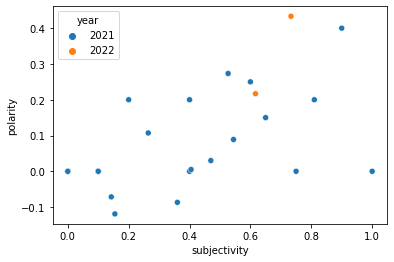

In [12]:
import seaborn as sns

sns.scatterplot(data=df, x='subjectivity', y='polarity', hue='year')

General Observations:
1. Polarity of 2021 soybean related news on USDA are generally neutral to positive (polarity between -0.1 to 0.4) whereras the 2 news at the start of 2022 are pretty positive (polarity between 0.2 to 0.4)
2. News with higher polarity scores tend to be more subjective (2021 news: polarity = 0.40 vs subjectivity = 0.90) and (2022 news: polarity = 0.42 vs subjectivity = 0.73) 

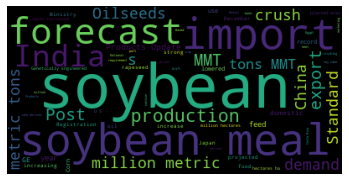

In [16]:
# Create Word Cloud to visualize repeated used words
from wordcloud import WordCloud

content_text = df['news_content'].values 
wordcloud = WordCloud().generate(str(content_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

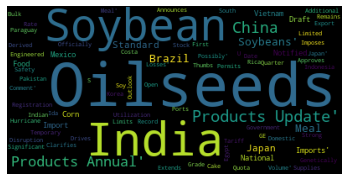

In [17]:
from wordcloud import WordCloud

title_text = df['news_title'].values 
wordcloud = WordCloud().generate(str(title_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
# Remove soybean from the content and titil to see other frequently used words
df['content'] = df['news_content'].str.replace(r'soybean', '',case=False)
df['title'] = df['news_title'].str.replace(r'Soybean', '',case=False)

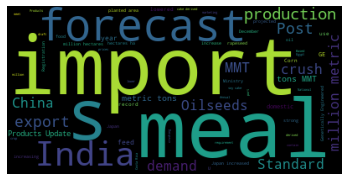

In [30]:
# Create Word Cloud to visualize repeated used words
from wordcloud import WordCloud

content_text = df['content'].values 
wordcloud = WordCloud().generate(str(content_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

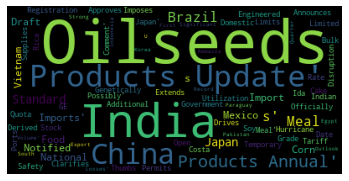

In [31]:
from wordcloud import WordCloud

title_text = df['title'].values 
wordcloud = WordCloud().generate(str(title_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()